---------------------------


# Performance Assessment: D208 Predictive Modeling Task 1 - Multiple Linear Regression.

## Michael Hindes
Department of Information Technology, Western Governors University
<br>D208: Predictive Modeling
<br>Professor Dr. Straw
<br>March 21, 2024


# Part I: Research Question
## Describe the purpose of this data analysis by doing the following::

### **A1. Research Question:**
**A1. Research Question:
"What factors contribute to the length of a patient's initial hospital stay?"**

This question aims to identify key variables within the dataset that influence `Initial_days`; The number of days the patient stayed in the hospital during the initial visit to the hospital. 

### **A2. Define the goals of the data analysis.**

The project sets out to explore the relationship between a response and predictor variables by exploring raw medical data and developing a multiple linear regression model. The research question focuses on identifying any potential factors that affect the length of a patient's initial hospital stay by exploring factors such as demographic details, medical history, financial factors, and services received. Python and associated libraries are used for analysis, and that supported by visual aids for clarity. Data cleaning and wrangling is emphasized to ensure accuracy and reliability.The Python code for analysis, data cleaning, and preparation will be shared. The culmination of this project involves creating, evaluating and reducing a multiple linear regression model, discussing its significance both statistically and practically, highlighting limitations, and suggesting actionable steps for stakeholders and future analysts based on the findings. Length of hospital stay is a critical metric in healthcare, as it can impact resource allocation, patient satisfaction, and overall hospital efficiency. By identifying the factors that contribute to a patient's hospital stay, healthcare providers can optimize their services, improve patient outcomes, and enhance the overall quality of care.

-------------------------------------


# Part II: Method Justification

## B. Describe multiple linear regression methods by doing the following:

### **B1. Summarize four assumptions of a multiple linear regression model:**

In the research on the assumption of multiple linear regression, five key assumptions were found in some places and four in others, in different combinations. They all appear critical to the validity of a model. As such I will list five assumptions below. (Statology 2023)

-   **Linearity** asserts that there is a straight-line relationship between each predictor (independent variable) and the response (dependent variable). In other words, a straight line can best show the average change in a dependent variable for one unit of change in the independent variable, holding all other independent variables constant. This can be assessed through visualizations.

-   **Little to no Multicollinearity** In an ideal scenario, the explanatory variables in the dataset should not significantly influence each other. Each observation's response should be primarily determined by its own predictor values and should be minimally affected by the values of other independent variables. 

-   **Independence of Observations** Assumes the observations in the dataset be independent of each other, meaning that the value of one observation should not be influenced by the value of another. Violations may occur in temporal or clustered data. If violated, it can lead to biased standard errors and incorrect inferences. Independence can be assessed using residual plots or statistical tests like the Durbin-Watson test.

-   **Homoscedasticity** refers to the requirement that the error terms (differences between observed and predicted values) maintain a constance variance across all points. This constant variance ensures that the model's accuracy does not depend on the value of the predictors. Homoscedasticity is often checked with a residuals plots to look for patterns where there should be none, and can be caused by a variety of factors.

-   **Normality of Errors** states that the residuals (errors) in the model are normally distributed around a mean of zero. This can be checked with a histogram or Q-Q plot of the residuals. If the residuals are not normally distributed, the model may not be accurate.

### **B2. Describe two benefits of using Python for data analysis:**

- **Rich Libraries:** While R was specifically designed with statistics and data analysis in mind, Python was chosen for its suite of libraries that facilitate every phase of the data analysis process. Libraries such as Pandas for data manipulation, NumPy for numerical computations, and Matplotlib along with Seaborn for visualizations. Statsmodels and Scikit-learn offers a platforms for applying regression and machine learning algorithms, streamlining the development of predictive models. These libraries help with a range of data analysis tasks.  (Western Governors University)

- **Versatility** Python's syntax is known for its intuitiveness and readability, and wide ranging application, making it a favorite for many, from data science to web development. This versatility extends beyond data analysis to other applications such as web development, automation, and deep learning. For instance, an analyst can easily switch from analyzing data to deploying a machine-learning model as a web application within the same programming environment. This flexibility is a significant advantage for working across multiple domains. (Western Governors University)

### **B3. Explain why multiple linear regression is an appropriate technique for analyzing the research question summarized in part I:**

Multiple linear regression (MLR) is an appropriate statistical technique for addressing the research question at hand, which aims to identify the factors contributing to the length of a patient's initial hospital stay. MLR is particularly suitable for this case because the dependent variable, `Initial_days`, is continuous, and MLR is designed to model the linear relationship between a continuous dependent variable and multiple independent variables. This sets MLR apart from other regression techniques that may handle multiple independent variables but are not specifically designed for continuous outcomes. MLR uses the independent variables to predict the value of `Initial_days`, providing insights into how each factor influences the length of a patient's initial hospital stay. By accounting for multiple factors simultaneously, MLR offers a more comprehensive understanding of the combined effects on the dependent variable. This is necessary for creating a model that can effectively inform decision-making processes and help identify the key factors influencing patient outcomes. MLR's ability to handle multiple variables and model the linear relationship between a continuous dependent variable and independent variables makes it an appropriate choice for analyzing datasets like medical_clean.csv.

# Part III: Data Preparation

## C. Summarize the data preparation process for multiple linear regression analysis by doing the following:

### **C1. Describe your data cleaning goals and the steps used to clean the data to achieve the goals that align with your research question including your annotated code.**

The cleaning process starts by reading the data into a pandas DataFrame and performing an initial examination to gain a preliminary understanding of its structure and content. This involves checking data types, identifying duplicate rows, and detecting missing values. Outliers are important to detect and be aware of, particularly when creating predictive regression models. In the context of medical data, outliers can often be the very things that are of interest, such as patients with very high cholesterol levels or very low blood pressure. These values are not necessarily errors but rather important indicators of health conditions. Therefore, outliers will be noted but not necessarily treated unless they are obvious data entry errors or if they hinder the model.

Unique values will be examined to understand the variety of information within the dataset, dropping unnecessary columns that are not relevant to the research question or predictive model, and converting categorical variables into numerical formats. Some demographic and identifier data, which represents static information about patients and cannot be altered by the hospital, will be excluded from the analysis. Missing data will be identified and addressed, ensuring its proper mitigation, and any duplicate records will be eliminated. Renaming of certain variables for a more descriptive understanding. Rounding data to a reasonable number of decimal places can improve readability and reduce computational complexity. Data visualizations such as scatter plots, histograms, and box plots will be used to understand the relationships between variables and identify patterns in the data distribution.


>### The following requirements from `Part C` of the performance assessment will be demonstrated in the multiple cells below.
-   >**C2.  Describe the dependent variable and all independent variables using summary statistics that are required to answer the research question.**

-   >**C3.  Generate univariate and bivariate visualizations of the distributions of the dependent and independent variables.**

-   >**C4.  Describe your data transformation goals that align with your research question**

*(The Python code used in the project was heavily informed and sometimes directly puulled from the documentation listed in the `Software` section of the References section concluding this project )*

In [1]:
# Import packages and libraries
%pip install scikit-learn
%pip install Jinja2
%matplotlib inline
%pip install statsmodels
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from pandas import DataFrame
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.


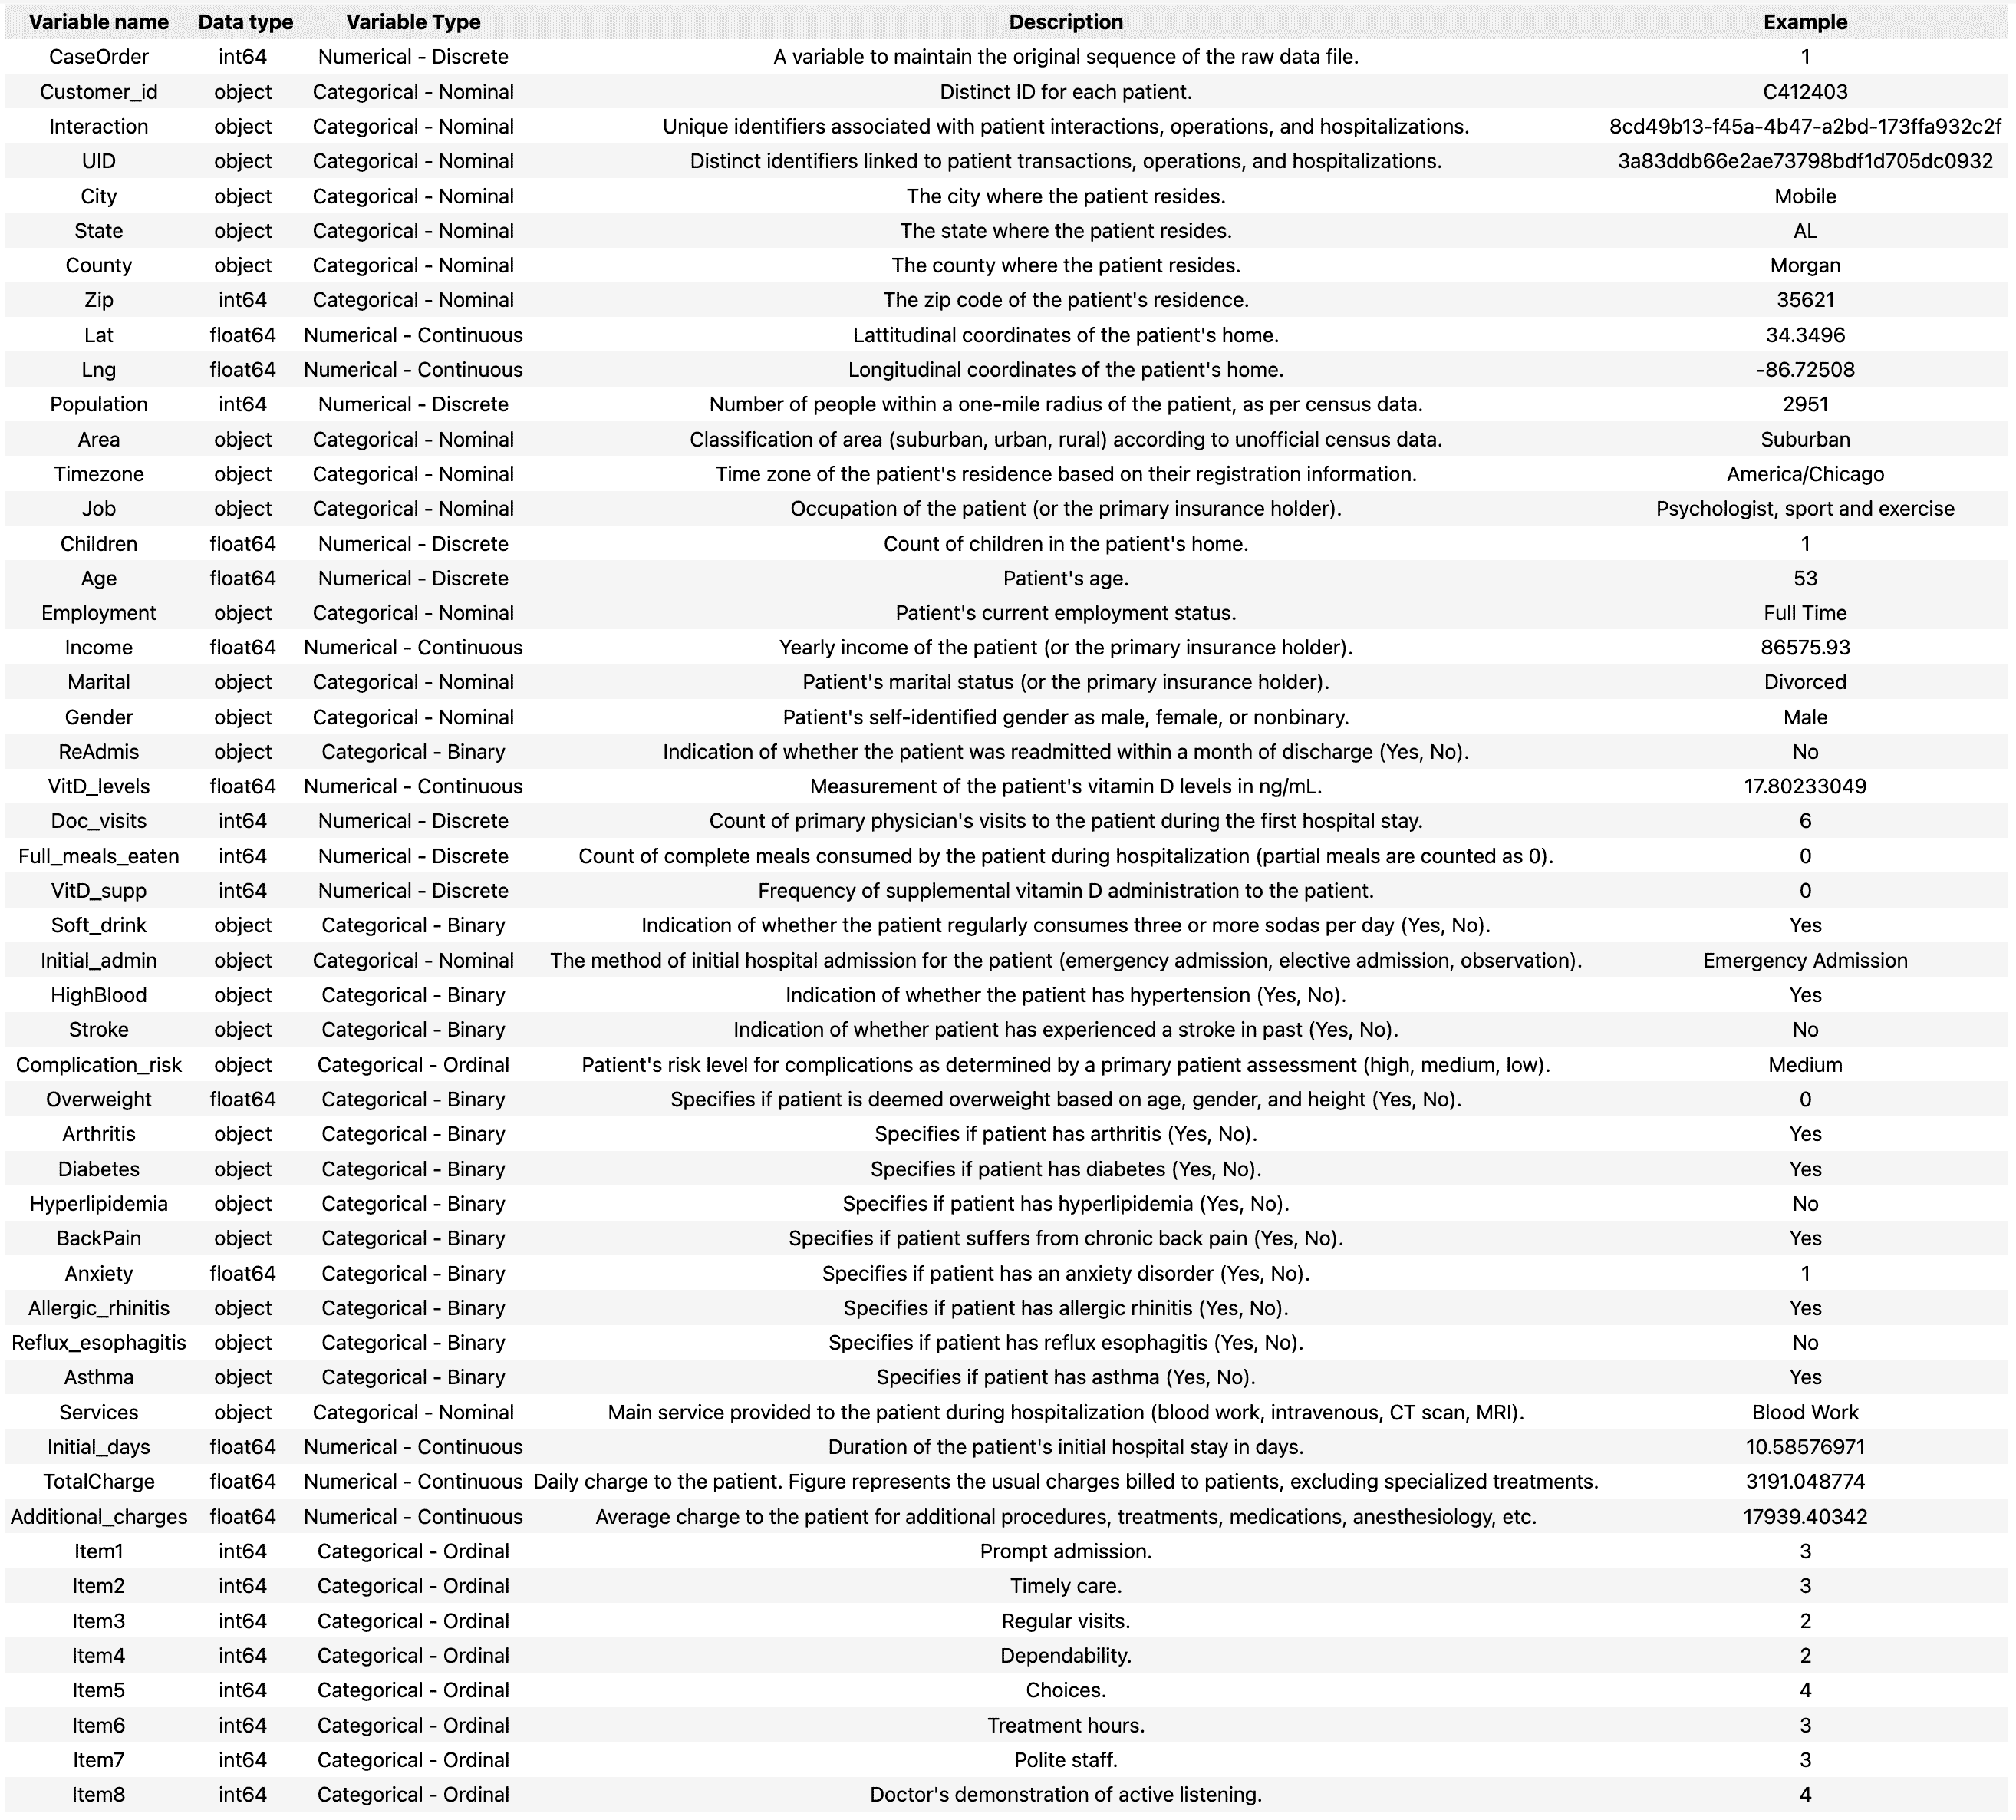

In [2]:
# original data variable description and data types with examples.
from IPython.display import Image
Image(filename='variable_description_208.png')

In [3]:
# import the data and read it into a dataframe, 
df_medical = pd.read_csv('D208_templates/medical_clean.csv')

# Display the first five rows of the data
df_medical.head()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
0,1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,...,3726.702860,17939.403420,3,3,2,2,4,3,3,4
1,2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,...,4193.190458,17612.998120,3,4,3,4,4,4,3,3
2,3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,...,2434.234222,17505.192460,2,4,4,4,3,4,3,3
3,4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,...,2127.830423,12993.437350,3,5,5,3,4,5,5,5
4,5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,...,2113.073274,3716.525786,2,1,3,3,5,3,4,3


In [4]:
# View the last 5 rows of the dataframe
df_medical.tail()

,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,...,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
9995,9996,B863060,a25b594d-0328-486f-a9b9-0567eb0f9723,39184dc28cc038871912ccc4500049e5,Norlina,NC,Warren,27563,36.42886,-78.23716,...,6850.942,8927.642,3,2,2,3,4,3,4,2
9996,9997,P712040,70711574-f7b1-4a17-b15f-48c54564b70f,3cd124ccd43147404292e883bf9ec55c,Milmay,NJ,Atlantic,8340,39.43609,-74.87302,...,7741.690,28507.150,3,3,4,2,5,3,4,4
9997,9998,R778890,1d79569d-8e0f-4180-a207-d67ee4527d26,41b770aeee97a5b9e7f69c906a8119d7,Southside,TN,Montgomery,37171,36.36655,-87.29988,...,8276.481,15281.210,3,3,3,4,4,2,3,2
9998,9999,E344109,f5a68e69-2a60-409b-a92f-ac0847b27db0,2bb491ef5b1beb1fed758cc6885c167a,Quinn,SD,Pennington,57775,44.10354,-102.01590,...,7644.483,7781.678,5,5,3,4,4,3,4,3
9999,10000,I569847,bc482c02-f8c9-4423-99de-3db5e62a18d5,95663a202338000abdf7e09311c2a8a1,Coraopolis,PA,Allegheny,15108,40.49998,-80.19959,...,7887.553,11643.190,4,3,3,2,3,6,4,3


In [5]:
# Check the DataFrame information
df_medical.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CaseOrder           10000 non-null  int64  
 1   Customer_id         10000 non-null  object 
 2   Interaction         10000 non-null  object 
 3   UID                 10000 non-null  object 
 4   City                10000 non-null  object 
 5   State               10000 non-null  object 
 6   County              10000 non-null  object 
 7   Zip                 10000 non-null  int64  
 8   Lat                 10000 non-null  float64
 9   Lng                 10000 non-null  float64
 10  Population          10000 non-null  int64  
 11  Area                10000 non-null  object 
 12  TimeZone            10000 non-null  object 
 13  Job                 10000 non-null  object 
 14  Children            10000 non-null  int64  
 15  Age                 10000 non-null  int64  
 16  Incom

In [6]:
# Check for duplicate rows. 
print(df_medical.duplicated().value_counts())
print('Total Duplicated Rows: ', df_medical.duplicated().sum())

False    10000
Name: count, dtype: int64
Total Duplicated Rows:  0


In [7]:
# Check for null values
df_medical.isnull().sum()

CaseOrder             0
Customer_id           0
Interaction           0
UID                   0
City                  0
State                 0
County                0
Zip                   0
Lat                   0
Lng                   0
Population            0
Area                  0
TimeZone              0
Job                   0
Children              0
Age                   0
Income                0
Marital               0
Gender                0
ReAdmis               0
VitD_levels           0
Doc_visits            0
Full_meals_eaten      0
vitD_supp             0
Soft_drink            0
Initial_admin         0
HighBlood             0
Stroke                0
Complication_risk     0
Overweight            0
Arthritis             0
Diabetes              0
Hyperlipidemia        0
BackPain              0
Anxiety               0
Allergic_rhinitis     0
Reflux_esophagitis    0
Asthma                0
Services              0
Initial_days          0
TotalCharge           0
Additional_charg

In [8]:
# rename columns Item 1 to Item 8 to the appropriate column names. The 'S_' modifier is used to indicate the column is a survey item.
new_col_names={
    'Item1':'S_T_Admission',
    'Item2':'S_T_Treatment', 
    'Item3':'S_T_Visits', 
    'Item4':'S_Reliability', 'Item5':'S_Options', 
    'Item6':'S_Hours_Treatment', 
    'Item7':'S_Staff', 
    'Item8':'S_Active_Listening'}
df_medical.rename(columns=new_col_names, inplace=True)
df_medical.columns

Index(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State',
       'County', 'Zip', 'Lat', 'Lng', 'Population', 'Area', 'TimeZone', 'Job',
       'Children', 'Age', 'Income', 'Marital', 'Gender', 'ReAdmis',
       'VitD_levels', 'Doc_visits', 'Full_meals_eaten', 'vitD_supp',
       'Soft_drink', 'Initial_admin', 'HighBlood', 'Stroke',
       'Complication_risk', 'Overweight', 'Arthritis', 'Diabetes',
       'Hyperlipidemia', 'BackPain', 'Anxiety', 'Allergic_rhinitis',
       'Reflux_esophagitis', 'Asthma', 'Services', 'Initial_days',
       'TotalCharge', 'Additional_charges', 'S_T_Admission', 'S_T_Treatment',
       'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment',
       'S_Staff', 'S_Active_Listening'],
      dtype='object')

In [9]:
# combine the data types and unique values count into a DataFrame easy reference and comparison
data_types = df_medical.dtypes
unique_values = df_medical.nunique()
comparison_df = pd.DataFrame({'Data Type': data_types, 'Unique Values': unique_values})
comparison_df.sort_values(by='Unique Values', ascending=False)

,Data Type,Unique Values
CaseOrder,int64,10000
Interaction,object,10000
UID,object,10000
Customer_id,object,10000
Initial_days,float64,9997
TotalCharge,float64,9997
Income,float64,9993
VitD_levels,float64,9976
Additional_charges,float64,9418
Lng,float64,8725


# Cardinality and Data Type Summary of Variables

## Numerical Variables
- `Income`: 9993 unique values (float64)
- `VitD_levels`: 9976 unique values (float64)
- `Initial_days`: 9997 unique values (float64)
- `TotalCharge`: 9997 unique values (float64)
- `Additional_charges`: 9418 unique values (float64)
- `Population`: 5951 unique values (int64)
- `Children`: 11 unique values (int64)
- `Age`: 72 unique values (int64)
- `Doc_visits`: 9 unique values (int64)
- `Full_meals_eaten`: 8 unique values (int64)
- `vitD_supp`: 6 unique values (int64)
- `Lat`: 8588 unique values (float64)
- `Lng`: 8725 unique values (float64)

## Ordinal Variables (Categorical)
- `S_T_Admission`: 8 unique values (int64)
- `S_T_Treatment`: 7 unique values (int64)
- `S_T_Visits`: 8 unique values (int64)
- `S_Reliability`: 7 unique values (int64)
- `S_Options`: 7 unique values (int64)
- `S_Hours_Treatment`: 7 unique values (int64)
- `S_Staff`: 7 unique values (int64)
- `S_Active_Listening`: 7 unique values (int64)

## Nominal Variables (Categorical)
- `Customer_id`: 10000 unique values (object)
- `Interaction`: 10000 unique values (object)
- `UID`: 10000 unique values (object)
- `City`: 6072 unique values (object)
- `State`: 52 unique values (object)
- `County`: 1607 unique values (object)
- `Zip`: 8612 unique values (int64)
- `Area`: 3 unique values (object)
- `TimeZone`: 26 unique values (object)
- `Job`: 639 unique values (object)
- `Marital`: 5 unique values (object)
- `Gender`: 3 unique values (object)
- `ReAdmis`: 2 unique values (object)
- `Soft_drink`: 2 unique values (object)
- `Initial_admin`: 3 unique values (object)
- `HighBlood`: 2 unique values (object)
- `Stroke`: 2 unique values (object)
- `Complication_risk`: 3 unique values (object)
- `Overweight`: 2 unique values (object)
- `Arthritis`: 2 unique values (object)
- `Diabetes`: 2 unique values (object)
- `Hyperlipidemia`: 2 unique values (object)
- `BackPain`: 2 unique values (object)
- `Anxiety`: 2 unique values (object)
- `Allergic_rhinitis`: 2 unique values (object)
- `Reflux_esophagitis`: 2 unique values (object)
- `Asthma`: 2 unique values (object)
- `Services`: 4 unique values (object)

**Given the nature of the data, there are several variables that will be excluded from the analysis. Here is a brief summary of the variables that will be excluded and the rationale for their exclusion:**

### Current Strategy Overview:
1. **Broad Inclusion**: *Cast a wide net* (Middleton, 2024) Start with a wide array of variables to capture potential influences on `Initial_days`, informed by domain knowledge and based on the reccomendation of the instructors of this course. 
2. **Build Initial Model**: Use this dataset to identify significant variables.
3. **Analyze & Refine**: Eliminate non-contributing or highly correlated variables based on initial model insights.
4. **Develop Reduced Model**: Focus on key variables for a streamlined, effective model.

### Variables Eliminated:
*Note: I am a former health care professional who has worked in several hospitals, and unfortunatly have had extensive hospital stays as a patient as well. While I am not an expert on this particular data, I do have some domain knowledge, and this domain knowledge helps inform some of my decision making here.*
- **TotalCharge & Additional Charges**: Possible high correlation and generally a result of `Initial_days` not a cause of. Patients and staff often unaware of these charges until after the fact.
- **Latitude & Longitude**: Limited interpretive value and adds to model complexity.
- **Identifiers (Customer_id, Interaction, UID)**: High uniqueness; ethical concerns.
- **Geographic (City, State, County, Zip, Population)**: Overly detailed, increasing model complexity, not short/medium term actionable.
- **TimeZone**: Relevance to hospital stay length is questionable, increases complexity.
- **Full_meals_eaten**: Restrictive and targeted diets and meals are so common and depends on patient and services that without context ths variable is not useful.
- **Job**: Subjective and variable in interpretation. Better suited for targeted occupational study.
- **Services**: All very common in diagnostic phase and itself dependent on too many unknown factors, and not likely to be significant predictors. Could add confusion. 
- **Soft_drink**: Poorly defined as soft drink can mean anything from un-caffinated carbonated water to a caffinated sugary soda.
- **Survey_Items**: These are highly subjective and lack context. They are also not actionable in the short term, and we do not know at which point in the admission process they were given: after or during initial stay, during or after readmission for some, or they received their bills?
- **ReAdmis**: Readmission by definition happen after the initial stay, so this is not a predictor, but possibly a result of it in terms of temporal order.
- **Gender**: Specifically because the data dictionary states self-identified, and all gender groups are not represented, the subjective nature and lack of inclusion make the accuracy of this variable questionable.
- **VitD_supp**: Lack of context and possible interaction with other variables related to health conditions.
- **Income, Marital, Children**: All might not be related to the patient per the data dictionary. In this context, the same "households" could could show as the same "person" in the dataset, but be two different people with different underlying conditions or situations. THis analysis assumes our observations are of individuals, not households. 
- **Complication_risk**: LAck of clarity on what this means, and may directly be tied to health related variables like high_blood or diabetes, possibly intruding interactions difficult to account for without more information.
- **Area**: A category prone to change and subjective interpretation since the data was collected.

In [10]:
# create reduced dataframe with only the columns  for the analysis
colms_to_drop = ['CaseOrder', 'TotalCharge', 'Services', 'Soft_drink', 'Additional_charges', 'Lat', 'Full_meals_eaten', 'Lng', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'TimeZone', 'Job', 'Population', 'Area', 'S_T_Treatment', 'S_T_Admission', 'S_T_Visits', 'S_Reliability', 'S_Options', 'S_Hours_Treatment', 'S_Staff', 'S_Active_Listening','vitD_supp', 'Complication_risk', 'Income', 'Marital', 'Children', 'Gender', 'ReAdmis']

df_reduced = df_medical.drop(colms_to_drop, axis=1)

# display the dataframe in full
pd.set_option('display.max_columns', None)
df_reduced.head().transpose()

,0,1,2,3,4
Age,53,51,53,78,22
VitD_levels,19.141466,18.940352,18.057507,16.576858,17.439069
Doc_visits,6,4,4,4,5
Initial_admin,Emergency Admission,Emergency Admission,Elective Admission,Elective Admission,Elective Admission
HighBlood,Yes,Yes,Yes,No,No
Stroke,No,No,No,Yes,No
Overweight,No,Yes,Yes,No,No
Arthritis,Yes,No,No,Yes,No
Diabetes,Yes,No,Yes,No,No
Hyperlipidemia,No,No,No,No,Yes


In [11]:
# Summary Stats For numeric variables

df_reduced.describe()

,Age,VitD_levels,Doc_visits,Initial_days
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,53.511700,17.964262,5.012200,34.455299
std,20.638538,2.017231,1.045734,26.309341
min,18.000000,9.806483,1.000000,1.001981
25%,36.000000,16.626439,4.000000,7.896215
50%,53.000000,17.951122,5.000000,35.836244
75%,71.000000,19.347963,6.000000,61.161020
max,89.000000,26.394449,9.000000,71.981490


### Initial Takeaways:

- **Age**: Averages 53 years, ranging from 18 to 89, with a diverse age profile. The lack of people under 18 may be due to laws or data collection practices, and is worth noting.
- **VitD_levels**: Averages 17.96, mostly within a narrow range (9.81 to 26.39), suggesting more consistent levels across patients.
- **Doc_visits**: Averages 5 visits, indicating a similar frequency of medical consultations.

- **Categorical** nominal and ordinal variables are not included here and will include a separate summary of proportions along wit univariate and bivariate visualizations.
- **Initial_days**: Our dependent (target) variable will be fully summarize and visualized below



# Rounding Justification. 
-    Rounding `'Initial_days'` from 8 decimal places to 2 reduces the number of unique values, which can simplify analyses and visualizations by reducing the granularity of the data. Precision beyond 2 decimal places for representing days does not add meaningful information for the analysis. In many practical scenarios, especially related to days, a precision of 2 decimal places is sufficient to capture relevant variations without unnecessarily complicating the dataset.  In healthcare data, for instance, it's unlikely that fractions of a day to eight decimal places would impact decisions or care outcomes.

- Similarly, rounding  `VitD_levels` to 2 decimal places seems appropriate in this context.

In [12]:
# round 'Initial_days' and 'VitD_levels' to 2 decimal places
df_reduced = df_reduced.round({'VitD_levels': 2})
df_reduced = df_reduced.round({'Initial_days': 2})

# fisplay the dataframe with the rounded values
df_reduced[['Initial_days', 'VitD_levels']].head()

,Initial_days,VitD_levels
0,10.59,19.14
1,15.13,18.94
2,4.77,18.06
3,1.71,16.58
4,1.25,17.44


In [13]:
# Export to csv and to save results so far and to reduce memory consumption.
df_reduced.to_csv('df_reduced.csv', index=False)

---------------------------

In [14]:
# Load the data
df = pd.read_csv('df_reduced.csv')
df

,Age,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,53,19.14,6,Emergency Admission,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.59
1,51,18.94,4,Emergency Admission,Yes,No,Yes,No,No,No,No,No,No,Yes,No,15.13
2,53,18.06,4,Elective Admission,Yes,No,Yes,No,Yes,No,No,No,No,No,No,4.77
3,78,16.58,4,Elective Admission,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,1.71
4,22,17.44,5,Elective Admission,No,No,No,No,No,Yes,No,No,Yes,No,No,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,16.98,4,Emergency Admission,Yes,No,No,No,No,No,No,Yes,No,Yes,No,51.56
9996,87,18.18,5,Elective Admission,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,68.67
9997,45,17.13,4,Elective Admission,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,70.15
9998,43,19.91,5,Emergency Admission,No,No,Yes,No,No,No,Yes,No,No,No,No,63.36


-------------------------------------


# C3.  Visualizations 

Below are Univariate and Bivariate Visualizations for explanatory variables showing their relationship with the dependent variable `Initial_days`. Seaborn and Matplotlib will be used to create visualizations and the choice of graph will depend on the nature of the variable being visualized. (Python Graph Gallery. n.d), (Eyre, 2024)

# Univaraite Visualizations

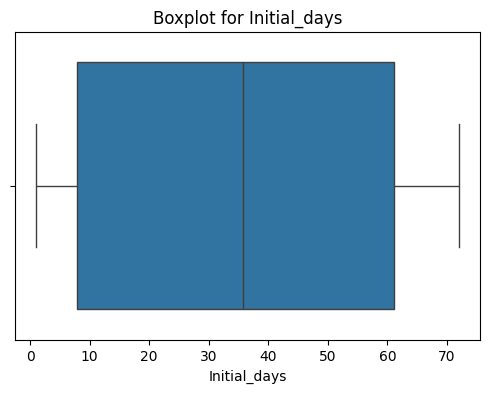

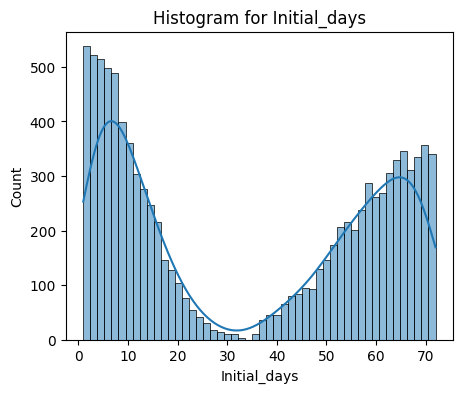

count    10000.000000
mean        34.455284
std         26.309382
min          1.000000
25%          7.900000
50%         35.840000
75%         61.162500
max         71.980000
Name: Initial_days, dtype: float64

In [15]:
# Boxplot for 'Initial_days'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['Initial_days'])
plt.title('Boxplot for Initial_days')
plt.show()

# Histogram for 'Initial_days'
plt.figure(figsize=(5, 4))
sns.histplot(data=df, x='Initial_days',  kde=True, bins=50)
plt.title('Histogram for Initial_days')
plt.show()

df['Initial_days'].describe()

- **Boxplot Observations**: The median appears to be above the mid-30s, suggesting that roughly half of the patients have shorter initial stays and the other half have longer. There are no visible outliers, indicating no extreme values or anomalies that fall outside the typical range. The interfertile range shows that the middle 50% of the data spans a rather large range, suggesting a concentration of data within this segment.

- **Histogram Observations**: The distribution is bimodal, with two peaks: one just under a few days and another around 70 days. This suggests there are two groups of patients with different typical hospital stay lengths. The histogram indicates that shorter initial stays are more common than longer stays, with a significant drop-off in frequency as the number of days increases towards the middle values. The spread between the two modes shows that there is variability in the data, not concentrated around a single central value. Understanding the reasons behind this bimodal distribution may require further investigation into the factors affecting hospital stay lengths. This distribution is important to kee in mind when interpreting the results of the regression analysis, as it may influence the model's predictive accuracy and the significance of the predictors.


**Summary**: Statistical measures for `Initial_days` across all patients in the dataset, including:

- **Count**: 10,000 observations. This represents the number of patients included in the analysis.
- **Mean**: Approximately 34 days. On average, patients spend a little over a month in the hospital.
- **Standard Deviation**: About 26 days. This indicates a wide variation in the length of hospital stays among patients; while some patients have short stays, others have significantly longer stays.
- **Minimum**: Just over 1 day. This shows that some patients are discharged almost immediately after admission.
- **25% (First Quartile)**: About 8 days or less. A quarter of the patients have hospital stays just over a week.
- **Median (50%)**: Approximately 36 days. This is very close to the mean. However, the slight difference between the mean and median indicates a slight skew in the data.
- **75% (Third Quartile)**: About 61 days or less. Most patients are discharged within two months.
- **Maximum**: Nearly 72 days. Indicates that some patients have extended hospital stays.

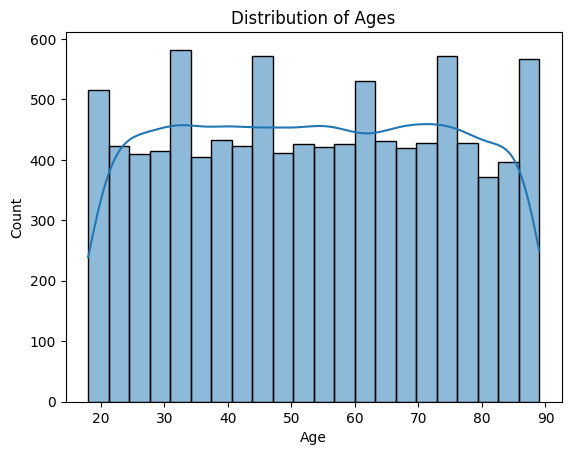

,count,mean,std,min,25%,50%,75%,max
Age,10000.0,53.5117,20.638538,18.0,36.0,53.0,71.0,89.0


In [16]:
# distribution of ages
sns.histplot(data=df, x='Age', kde=True)
plt.title('Distribution of Ages')

plt.show()

# summary statistics for the variables
df[['Age']].describe().transpose()

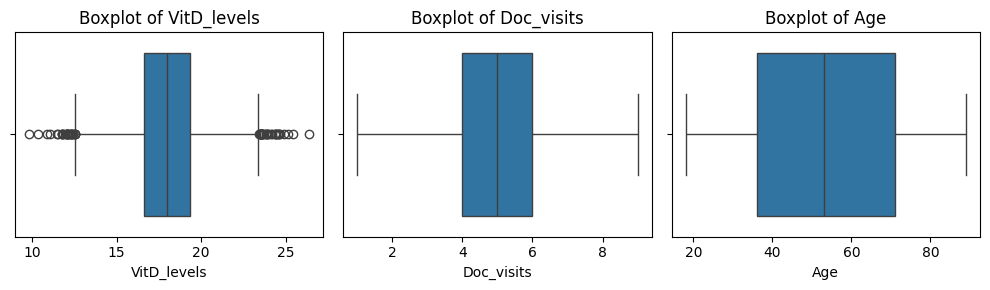

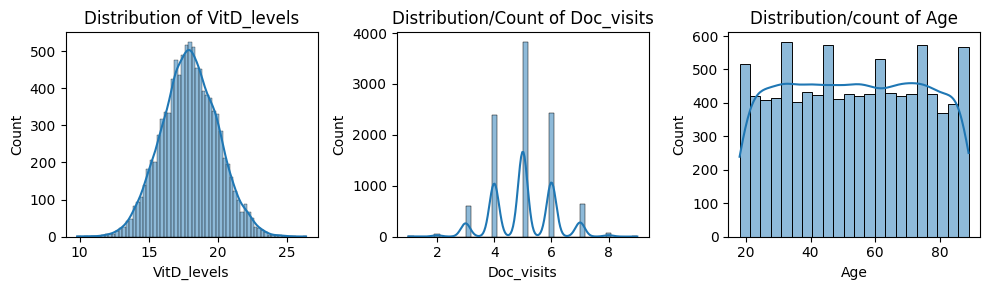

,count,mean,std,min,25%,50%,75%,max
VitD_levels,10000.0,17.964272,2.017259,9.81,16.6275,17.95,19.35,26.39
Doc_visits,10000.0,5.012200,1.045734,1.00,4.0000,5.00,6.00,9.00
Age,10000.0,53.511700,20.638538,18.00,36.0000,53.00,71.00,89.00


In [17]:
# subplots for the boxplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# boxplot of VitD_levels
sns.boxplot(data=df, x='VitD_levels', ax=axes[0])
axes[0].set_title('Boxplot of VitD_levels')

# boxplot of Doc_visit
sns.boxplot(data=df, x='Doc_visits', ax=axes[1])
axes[1].set_title('Boxplot of Doc_visits')

# boxplot of age
sns.boxplot(data=df, x='Age', ax=axes[2])
axes[2].set_title('Boxplot of Age')

plt.tight_layout()
plt.show()

# subplots for the histplots
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

# distribution/count of VitD_levels
sns.histplot(data=df, x='VitD_levels', ax=axes[0], kde=True)
axes[0].set_title('Distribution of VitD_levels')

# distribution/count of Doc_visit
sns.histplot(data=df, x='Doc_visits', ax=axes[1], kde=True)
axes[1].set_title('Distribution/Count of Doc_visits')

# distribution/count of age
sns.histplot(data=df, x='Age', ax=axes[2], kde=True, palette='muted')
axes[2].set_title('Distribution/count of Age')

plt.tight_layout()
plt.show()
# descriptive statistics for the variables
df[['VitD_levels', 'Doc_visits', 'Age']].describe().transpose()

- The `Vitamin D levels` appear normally distributed around a middle value, suggesting that most patients have Vitamin D levels within a standard range, with fewer individuals having very high or very low levels. The boxplot suggests outliers, but in the context of the health care setting, outliers are likley the things that trigger supplementation, and relevant. `Doc_visits` show a pattern with most patientss having 4-6 visits, and the frequency drops for higher numbers of visits. Age appears generall uniform, with no values under the age of 18.

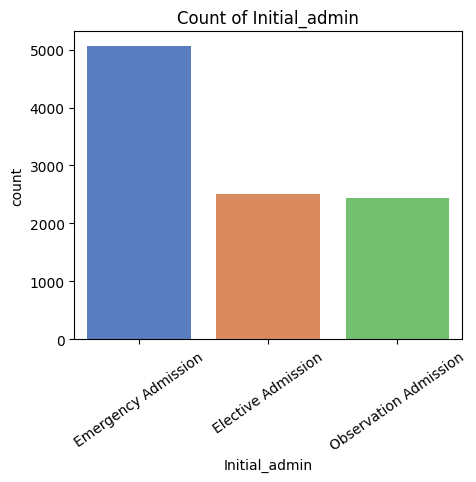

In [18]:
# create a countplot for initial_admin
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Initial_admin', palette='muted')
plt.title('Count of Initial_admin')
plt.xticks(rotation=35)
plt.show()

>  Proportion Summary 

`Initial_admin`
- Emergency: 51.60%
- Elective: 25.04%
- Observation: 24.36%


# Bivariate Visualizations

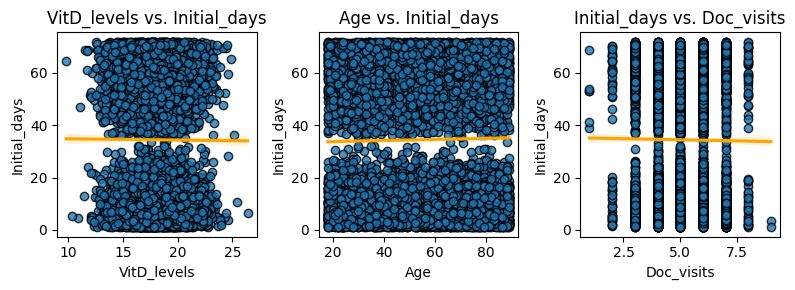

In [19]:
# Bivariate Graphs with Initial_days
plt.figure(figsize=(8, 3))

#  vitD_levels vs. Initial_days
plt.subplot(1, 3, 1)
sns.regplot(data=df, x='VitD_levels', y='Initial_days',  scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('VitD_levels vs. Initial_days')

# Age vs. Initial_days
plt.subplot(1, 3, 2)
sns.regplot(data=df, x='Age', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Age vs. Initial_days')

# Initial_days vs. Doc_visits
plt.subplot(1, 3, 3)
sns.regplot(data=df, x='Doc_visits', y='Initial_days', scatter_kws={'edgecolor':'black'}, line_kws={'color':'orange'})
plt.title('Initial_days vs. Doc_visits')

plt.tight_layout()
plt.show()

 - `Vitamin D` levels and initial days don't seem to have a clear pattern, with no obvious relationship. `Age` shows a spread of data across the age range without a strong trend. `Doc_visits` suggest that there is no strong, straightforward relationship between the number of doctor visits and the average initial days, as increased doctor visits do not correlate with either a significant increase or decrease in the initial days. The bimodal distribution of Initial_days may be why one sees distributions grouped above and below the lines.

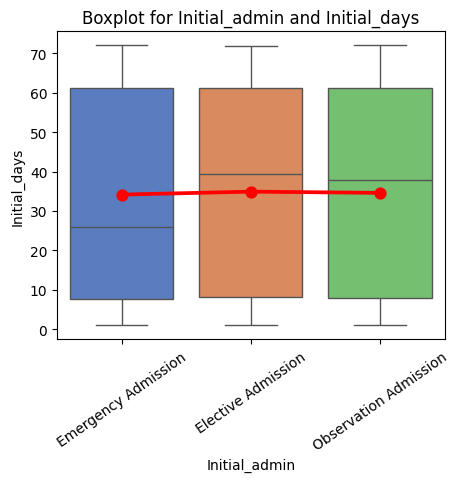

In [20]:
# boxplot with Initial_admin and Initial_days

plt.figure(figsize=(5, 4))
sns.boxplot(data=df, x='Initial_admin', y='Initial_days', palette='muted')
sns.pointplot(data=df, x='Initial_admin', y='Initial_days', color='red', estimator=np.mean, errorbar=None)
plt.title('Boxplot for Initial_admin and Initial_days')
plt.xticks(rotation=35)
plt.show()

 Interstingly, `Initial_admin` shows a higher median for elective admissions compared to emergency admissions.

- *The red lines in the boxplot show the mean values for each group. This is more about practice with visualizations than anything and to quickly compare the mean to the median. If the mean is far away from the median, could suggests that the distribution of `Initial_days` within the category is skewed. However, the skewness alone does not directly tell one that it is a poor candidate for the model. Additionally, the order of the arrangement of categories on the x-axis of can influence the interpretation and direction of the mean line trend. If the categories are arranged in a certain order, the mean line might appear to trend up, down, or remain flat. So it's important to not draw those kinds of conclusions from the mean line alone.*

----------------------------------------------------------------------

In [21]:
df = pd.read_csv('df_reduced.csv')
df

,Age,VitD_levels,Doc_visits,Initial_admin,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days
0,53,19.14,6,Emergency Admission,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,10.59
1,51,18.94,4,Emergency Admission,Yes,No,Yes,No,No,No,No,No,No,Yes,No,15.13
2,53,18.06,4,Elective Admission,Yes,No,Yes,No,Yes,No,No,No,No,No,No,4.77
3,78,16.58,4,Elective Admission,No,Yes,No,Yes,No,No,No,No,No,Yes,Yes,1.71
4,22,17.44,5,Elective Admission,No,No,No,No,No,Yes,No,No,Yes,No,No,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,16.98,4,Emergency Admission,Yes,No,No,No,No,No,No,Yes,No,Yes,No,51.56
9996,87,18.18,5,Elective Admission,Yes,No,Yes,Yes,Yes,No,No,No,No,No,Yes,68.67
9997,45,17.13,4,Elective Admission,Yes,No,Yes,No,No,No,No,Yes,Yes,No,No,70.15
9998,43,19.91,5,Emergency Admission,No,No,Yes,No,No,No,Yes,No,No,No,No,63.36


# C4 Data Transformation
## Reexpression of categorical variables

- Since the dataset contains several  categorical variables, it is essential to re-express these variables in a numerical format to include them in the regression model. Ordinal and binary variables *(Yes/No->1/0)* will be re-expressed as well using pythons `replace` method. Nominal variables will be one-hot encoded, which involves re-expressing categorical variables as binary variables, a format the regression model can use, by creating dummy variables for each category within a categorical variable. The Pandas library provides a method for performing this transformation using the `pd.get_dummies()` function. This function creates a new binary column for each category in a categorical variable, `1` indicating the presence of that category and `0` indicating the absence. The original categorical variable is then dropped from the dataset to avoid multicollinearity issues in the regression model.


In [22]:
# select and show values counts for binary variables to compare berfore and after reexpression 
binary_vars = [col for col in df.columns if df[col].isin(['Yes', 'No']).all()]
for col in binary_vars:
    print(df[col].value_counts())

HighBlood
No     5910
Yes    4090
Name: count, dtype: int64
Stroke
No     8007
Yes    1993
Name: count, dtype: int64
Overweight
Yes    7094
No     2906
Name: count, dtype: int64
Arthritis
No     6426
Yes    3574
Name: count, dtype: int64
Diabetes
No     7262
Yes    2738
Name: count, dtype: int64
Hyperlipidemia
No     6628
Yes    3372
Name: count, dtype: int64
BackPain
No     5886
Yes    4114
Name: count, dtype: int64
Anxiety
No     6785
Yes    3215
Name: count, dtype: int64
Allergic_rhinitis
No     6059
Yes    3941
Name: count, dtype: int64
Reflux_esophagitis
No     5865
Yes    4135
Name: count, dtype: int64
Asthma
No     7107
Yes    2893
Name: count, dtype: int64


In [23]:
# re-expression of binary variables
df[binary_vars] = df[binary_vars].replace({'Yes': 1, 'No': 0})

# check the unique values for the binary variables
for col in binary_vars:
    print(df[col].value_counts())

HighBlood
0    5910
1    4090
Name: count, dtype: int64
Stroke
0    8007
1    1993
Name: count, dtype: int64
Overweight
1    7094
0    2906
Name: count, dtype: int64
Arthritis
0    6426
1    3574
Name: count, dtype: int64
Diabetes
0    7262
1    2738
Name: count, dtype: int64
Hyperlipidemia
0    6628
1    3372
Name: count, dtype: int64
BackPain
0    5886
1    4114
Name: count, dtype: int64
Anxiety
0    6785
1    3215
Name: count, dtype: int64
Allergic_rhinitis
0    6059
1    3941
Name: count, dtype: int64
Reflux_esophagitis
0    5865
1    4135
Name: count, dtype: int64
Asthma
0    7107
1    2893
Name: count, dtype: int64


In [24]:
#to csv to save progress so far.
df.to_csv('df_for_one_hot.csv', index=False)

In [25]:
#read the csv
df = pd.read_csv('df_for_one_hot.csv')
df.head().transpose()

,0,1,2,3,4
Age,53,51,53,78,22
VitD_levels,19.14,18.94,18.06,16.58,17.44
Doc_visits,6,4,4,4,5
Initial_admin,Emergency Admission,Emergency Admission,Elective Admission,Elective Admission,Elective Admission
HighBlood,1,1,1,0,0
Stroke,0,0,0,1,0
Overweight,0,1,1,0,0
Arthritis,1,0,0,1,0
Diabetes,1,0,1,0,0
Hyperlipidemia,0,0,0,0,1


-   To handle nominal variables (categorical variables with no inherent order) in a regression model, one-hot encoding is often used. This transforms each unique category of a variable into a separate binary variable. Each new binary variable represents the presence (1) or absence (0) of the category for a data point. (Middleton, 2022)

-   To avoid introducing multicollinearity, it's common practice to drop one of the binary variables from each encoded category. Which will be done with the optional argument `drop_first=True` in the `pd.get_dummies` method.


In [26]:
# Using get_dummies to convert nominal variables to 1 and 0 for one-hot encoding and drop the first column to avoid multicollinearity.
nominal_vars = ['Initial_admin']
df_encoded = pd.get_dummies(df, columns=nominal_vars, dtype=int, drop_first=True)

In [27]:
# Show the head of the encoded DataFrame
pd.set_option('display.max_columns', None)
df_encoded

,Age,VitD_levels,Doc_visits,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,Initial_admin_Emergency Admission,Initial_admin_Observation Admission
0,53,19.14,6,1,0,0,1,1,0,1,1,1,0,1,10.59,1,0
1,51,18.94,4,1,0,1,0,0,0,0,0,0,1,0,15.13,1,0
2,53,18.06,4,1,0,1,0,1,0,0,0,0,0,0,4.77,0,0
3,78,16.58,4,0,1,0,1,0,0,0,0,0,1,1,1.71,0,0
4,22,17.44,5,0,0,0,0,0,1,0,0,1,0,0,1.25,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,25,16.98,4,1,0,0,0,0,0,0,1,0,1,0,51.56,1,0
9996,87,18.18,5,1,0,1,1,1,0,0,0,0,0,1,68.67,0,0
9997,45,17.13,4,1,0,1,0,0,0,0,1,1,0,0,70.15,0,0
9998,43,19.91,5,0,0,1,0,0,0,1,0,0,0,0,63.36,1,0


In [28]:
# rename Initial_admin_Emergency Admission	Initial_admin_Observation Admission to em_admin and ob_admin respectively
new_col_names = {
    'Initial_admin_Emergency Admission': 'em_admin',
    'Initial_admin_Observation Admission': 'ob_admin'
}
df_encoded.rename(columns=new_col_names, inplace=True)
df_encoded.head().transpose()


,0,1,2,3,4
Age,53.00,51.00,53.00,78.00,22.00
VitD_levels,19.14,18.94,18.06,16.58,17.44
Doc_visits,6.00,4.00,4.00,4.00,5.00
HighBlood,1.00,1.00,1.00,0.00,0.00
Stroke,0.00,0.00,0.00,1.00,0.00
Overweight,0.00,1.00,1.00,0.00,0.00
Arthritis,1.00,0.00,0.00,1.00,0.00
Diabetes,1.00,0.00,1.00,0.00,0.00
Hyperlipidemia,0.00,0.00,0.00,0.00,1.00
BackPain,1.00,0.00,0.00,0.00,0.00


In [29]:
#FINAL CLEAN TRANSFORMED CSV
df_encoded.to_csv('medical_transformed.csv', index=False)

--------------------

- Import Transformed Data for Initial model

In [71]:
df = pd.read_csv('medical_transformed.csv')
df.head()

,Age,VitD_levels,Doc_visits,HighBlood,Stroke,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Initial_days,em_admin,ob_admin
0,53,19.14,6,1,0,0,1,1,0,1,1,1,0,1,10.59,1,0
1,51,18.94,4,1,0,1,0,0,0,0,0,0,1,0,15.13,1,0
2,53,18.06,4,1,0,1,0,1,0,0,0,0,0,0,4.77,0,0
3,78,16.58,4,0,1,0,1,0,0,0,0,0,1,1,1.71,0,0
4,22,17.44,5,0,0,0,0,0,1,0,0,1,0,0,1.25,0,0


--------------------

# Part IV: Model Comparison and Analysis

## D. Compare an initial and a reduced linear regression model by doing the following:

### **D1. Construct an initial multiple linear regression model from all independent variables that were identified in part C2:**

*The processes and code below were informed by several source mentioned in the refrence section. (Sewell, 2024), (UnfoldDataScience YouTube, 2023), (Stack Overflow, 2020), (GeeksforGeeks, 2023)*

In [72]:
# muultiple regression model_i using df and ols and 'Initial_days' as the dependent variable and all other variables in the dataset as independent variables
X_i = df.drop('Initial_days', axis=1)
Y_i = df['Initial_days']
X_i = sm.add_constant(X_i)
model_i = sm.OLS(Y_i, X_i).fit()
predictions_i = model_i.predict(X_i)
model_summary_i = model_i.summary()
model_summary_i

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.116
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.333
Time:                        00:19:24   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9983   BIC:                         9.391e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 35.0446      2.868     12.221      0.000      29.424      40.666
Age                    0.0204      0.013      1.598      0.110      -0.005       0.045
VitD_levels           -0.0398      0.131     -0.305      0.761      -0.296       0.216
Doc_visits            -0.1741      0.252     -0.691      0.489      -0.668       0.320
HighBlood             -0.3410      0.535     -0.637      0.524      -1.391       0.709
Stroke                -0.1224      0.659     -0.186      0.853      -1.414       1.169
Overweight            -0.6138      0.580     -1.058      0.290      -1.751       0.523
Arthritis              1.0278      0.549      1.871      0.061      -0.049       2.105
Diabetes              -0.1319      0.591     -0.223      0.823      -1.289       1.026
Hyperlipidemia        -0.2208      0.557     -0.396      0.692      -1.313       0.871
BackPain               0.9317      0.535      1.741      0.082      -0.117       1.981
Anxiety                0.6549      0.564      1.162      0.245      -0.450       1.760
Allergic_rhinitis      0.1806      0.539      0.335      0.737      -0.875       1.237
Reflux_esophagitis     0.6320      0.535      1.182      0.237      -0.416       1.680
Asthma                -0.8061      0.581     -1.388      0.165      -1.944       0.332
em_admin              -0.7411      0.643     -1.152      0.249      -2.002       0.520
ob_admin              -0.2822      0.749     -0.377      0.706      -1.751       1.187
==============================================================================
Omnibus:                    41372.809   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1280.749
Skew:                           0.070   Prob(JB):                    7.74e-279
Kurtosis:                       1.252   Cond. No.                         656.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
# calculate RSE
mse = model_i.scale
# Calculate RSE
rse = np.sqrt(mse)
print("Residual Standard Error (RSE):", rse)

Residual Standard Error (RSE): 26.30694273393474


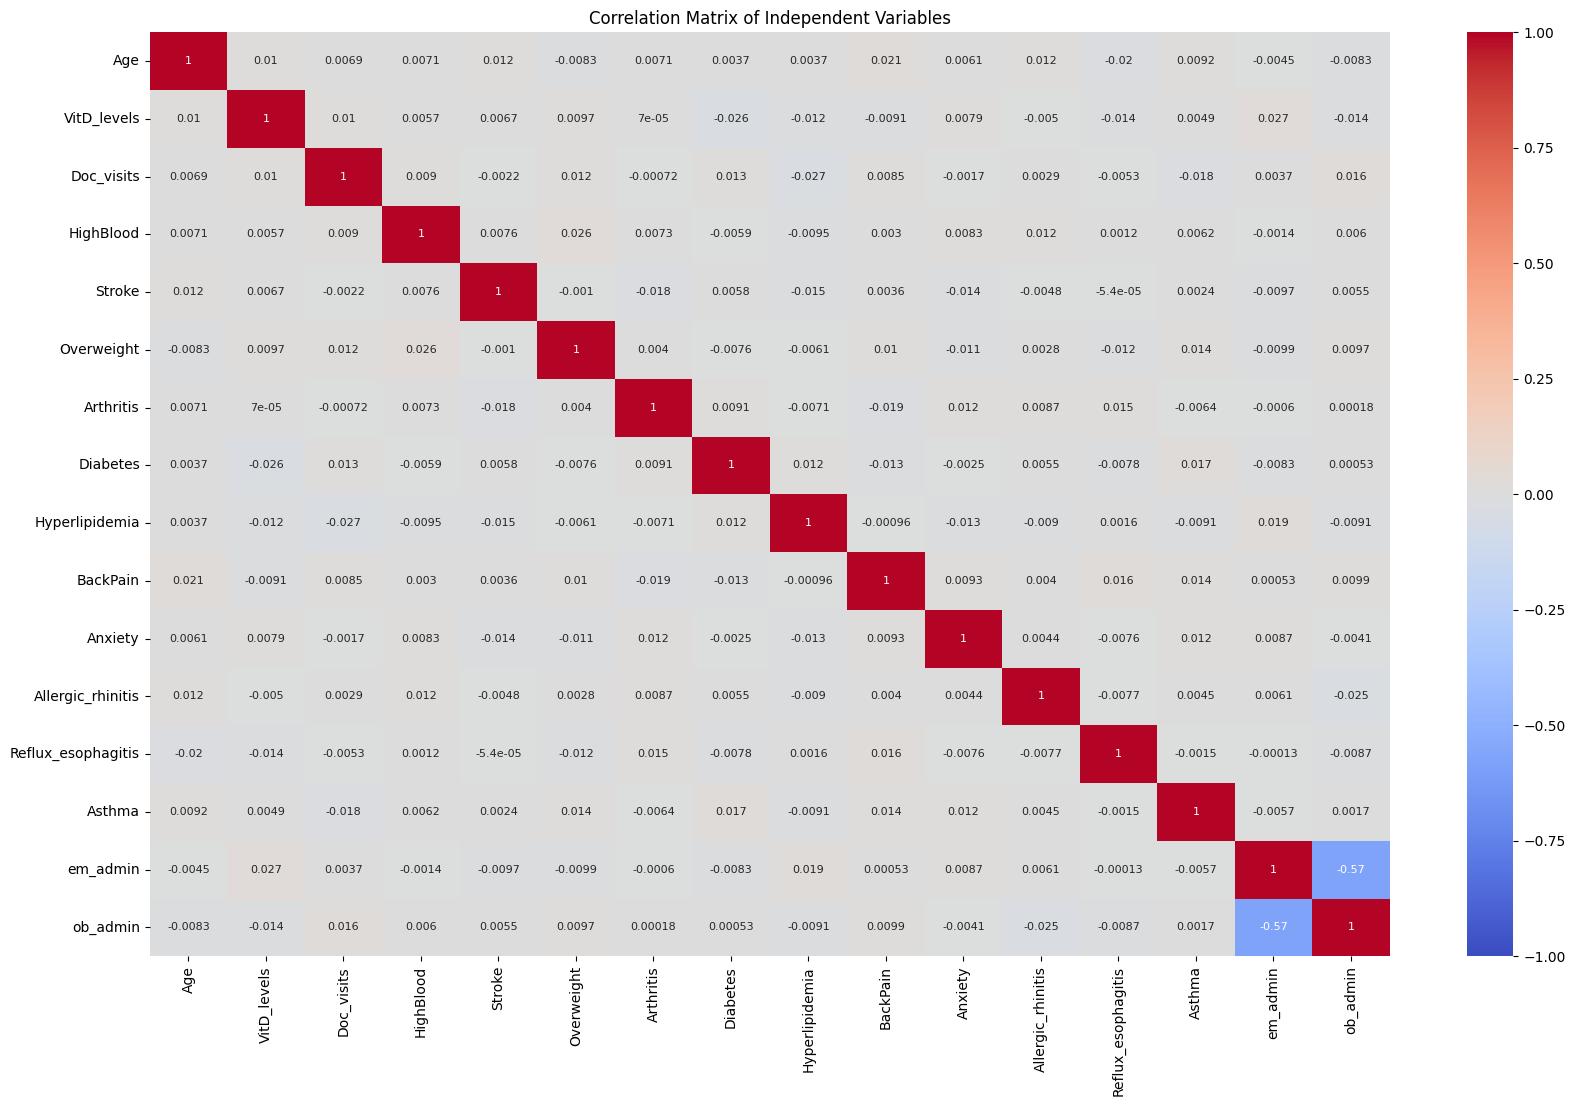

In [33]:
# assign independent variables
corr_matrix = df.drop('Initial_days', axis=1).corr()
plt.figure(figsize=(20, 12))
# correlation matrix with  values and adjusted font size
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, annot_kws={"size": 8}, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Independent Variables')
plt.show()

- The corilation matrix suggest no strong interaction between variables except for the _admin variables, which is liklely a product of the one-hot encoding process.

In [73]:
# perform VIF analysis to check for multicollinearity
X_i = add_constant(X_i)
vif = pd.DataFrame()
vif["variables"] = X_i.columns
vif["VIF"] = [variance_inflation_factor(X_i, i) for i in range(X_i.shape[1])]
vif.sort_values(by='VIF', ascending=False)

,variables,VIF
0,const,118.814170
16,ob_admin,1.494865
15,em_admin,1.494829
2,VitD_levels,1.002346
3,Doc_visits,1.002212
9,Hyperlipidemia,1.002128
10,BackPain,1.002023
8,Diabetes,1.001883
1,Age,1.001826
6,Overweight,1.001809


- Vif scores are well below 5 to 10

## Initial Model Fit:

- The R-squared of 0.002 is exceedingly low, indicating that the model explains only about 0.2% of the variability in `Initial_days`. This value, combined with an Adjusted R-squared of 0.000, suggests a model that offers little to no explanatory power and suggests a poor fit to the data.
- The F-statistic is 1.116 with a Prob (F-statistic) of 0.333, indicates that the model is not statistically significant overall.
- The AIC 9.379e+04 and BIC 9.391e+04 values are quite high and very close to each other, which suggests they agree in their assessment of model complexity. However, lower values for AIC and BIC are usually preferred, as they indicate a better balance of model fit and parsimony. These metrics will be monitored for improvement in the reduced model.
- Residual Standard Error calculation (RSE): 26.31. With an RSE of 26.31 days and considering that `Initial_days` ranges from 1 to 72 days, the RSE is substantial, amounting to more than 36% (26.31 / 72 * 100) of the range of the dependent variable. This implies that the model's predictions could deviate from actual values by an average of 26.31 days, which is considerable and suggests significant potential for model improvement.

-   The constant coefficient (y-intercept) of 35.0446 is the expected value of `Initial_days` when all predictors are set to their reference levels (usually zero). This intercept may serve as a baseline prediction when none of the risk factors or characteristics in the model are present.

-   The coefficients for the initial features in my model appear to all be above a p-value of 0.05, which is the typical threshold for statistical significance. This suggests that the initial model may not be capturing the true relationships between the predictors and the dependent variable. This is important to consider given my feature selection critera below.

> ## **D2. Justify a statistically based feature selection procedure or a model evaluation metric to reduce the initial model in a way that aligns with the research question:**

- The feature selection in this linear regression model will be based on the statistical significance of each independent variable, indicated by their p-values. P-values in this context measure the probability that an observed effect occurs by chance under the null hypothesis, which assumes that a given independent variable has no impact on the dependent variable (Inital_days ). A p-value below 0.05 suggests a less than 5% chance that a observed relationship is coincidental, and suggests that onee should keep the variable for its potential explanatory power. Typically, we would try to achieve this threshold. But given the high pvalues, we may have to lower the standard to p < 0.1 depending on what happens as we reduce the model.

- Using a backward elimination technique, the plan here is to remove one variable at a time, beginning with the one having the highest p-value (least statistically significant). After each removal, the model will be recalculated to assess the changes in the relationships between the remaining variables. This process will continue until all remaining features in the model have p-values below the chosen significance level of 0.05. To evaluate the overall statistical signifigance  of the initial model compared to the reduced model, we will  compare the previously mentioned model metrics in the initial model summary. By comparing these values between the initial and reduced models, we can evaluate the impact of feature selection on the model's performance and statistical significance.

- The backward elimination technique aligns with the research question by identifying the factors (independent variables) that significantly contribute to the length of a patient's initial hospital stay (dependent variable). By removing variables with high p-values (least statistically significant) and retaining those qwith p-values below the chosen significance level (0.05), we are focusing on the factors that have a higher likelihood of influencing the length of patients initial stay in the hospital.

In [74]:
# model's results and identify variables with p-values >= 0.05
p_values = model_i.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')

# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Stroke,0.852657
Diabetes,0.823286
VitD_levels,0.760668
Allergic_rhinitis,0.737443
ob_admin,0.706482
Hyperlipidemia,0.691854
HighBlood,0.524280
Doc_visits,0.489426
Overweight,0.289892
em_admin,0.249350


> ### Drop `Stroke` given highest current p-value

In [36]:
X = df.drop(['Initial_days', 'Stroke'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.000
Method:,Least Squares,F-statistic:,1.188
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.272
Time:,00:16:30,Log-Likelihood:,-46879.
No. Observations:,10000,AIC:,9.379e+04
Df Residuals:,9984,BIC:,9.391e+04
Df Model:,15,,
Covariance Type:,nonrobust,,


In [37]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Diabetes,0.822369
VitD_levels,0.759671
Allergic_rhinitis,0.736736
ob_admin,0.706466
Hyperlipidemia,0.693870
HighBlood,0.523320
Doc_visits,0.489741
Overweight,0.289987
em_admin,0.249899
Anxiety,0.244167


> ### Drop `Diabetes` given highest current p-value

In [75]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.000
Method:,Least Squares,F-statistic:,1.270
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.218
Time:,00:22:33,Log-Likelihood:,-46879.
No. Observations:,10000,AIC:,9.379e+04
Df Residuals:,9985,BIC:,9.390e+04
Df Model:,14,,
Covariance Type:,nonrobust,,


In [76]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
VitD_levels,0.763999
Allergic_rhinitis,0.737606
ob_admin,0.707289
Hyperlipidemia,0.691831
HighBlood,0.524126
Doc_visits,0.487705
Overweight,0.290726
em_admin,0.250715
Anxiety,0.243925
Reflux_esophagitis,0.236444


> ### Drop `VitD_levels` given highest current p-value

In [40]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.000
Method:,Least Squares,F-statistic:,1.360
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.170
Time:,00:16:30,Log-Likelihood:,-46879.
No. Observations:,10000,AIC:,9.379e+04
Df Residuals:,9986,BIC:,9.389e+04
Df Model:,13,,
Covariance Type:,nonrobust,,


In [41]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Allergic_rhinitis,0.736317
ob_admin,0.706795
Hyperlipidemia,0.694445
HighBlood,0.523089
Doc_visits,0.485852
Overweight,0.289362
em_admin,0.247611
Anxiety,0.244795
Reflux_esophagitis,0.234739
Asthma,0.163169


> ### Drop `Allergic_rhinitis` given highest current p-value

In [42]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]


Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,1.464
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.130
Time:,00:16:30,Log-Likelihood:,-46879.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9987,BIC:,9.388e+04
Df Model:,12,,
Covariance Type:,nonrobust,,


In [43]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
ob_admin,0.700003
Hyperlipidemia,0.692239
HighBlood,0.525567
Doc_visits,0.486471
Overweight,0.289726
em_admin,0.246167
Anxiety,0.244246
Reflux_esophagitis,0.235753
Asthma,0.163568
Age,0.110530


> ### Drop `ob_admin` given highest current p-value

In [44]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,1.584
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0961
Time:,00:16:30,Log-Likelihood:,-46879.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9988,BIC:,9.387e+04
Df Model:,11,,
Covariance Type:,nonrobust,,


In [45]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Hyperlipidemia,0.691388
HighBlood,0.524003
Doc_visits,0.481158
Overweight,0.288978
em_admin,0.251596
Anxiety,0.244392
Reflux_esophagitis,0.234039
Asthma,0.163746
Age,0.109280
BackPain,0.081236


> ### Drop `Hyperlipidemia` given highest current p-value

In [46]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,1.727
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0688
Time:,00:16:30,Log-Likelihood:,-46880.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9989,BIC:,9.386e+04
Df Model:,10,,
Covariance Type:,nonrobust,,


In [47]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
HighBlood,0.526282
Doc_visits,0.487647
Overweight,0.289906
em_admin,0.248374
Anxiety,0.242215
Reflux_esophagitis,0.234248
Asthma,0.164827
Age,0.109639
BackPain,0.081178
Arthritis,0.060271


> ### Drop `Hyperlipidemia` given highest current p-value

In [48]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,1.727
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0688
Time:,00:16:30,Log-Likelihood:,-46880.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9989,BIC:,9.386e+04
Df Model:,10,,
Covariance Type:,nonrobust,,


In [49]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
HighBlood,0.526282
Doc_visits,0.487647
Overweight,0.289906
em_admin,0.248374
Anxiety,0.242215
Reflux_esophagitis,0.234248
Asthma,0.164827
Age,0.109639
BackPain,0.081178
Arthritis,0.060271


> ### Drop `HighBlood` given highest current p-value

In [50]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia', 'HighBlood'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,1.874
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0509
Time:,00:16:30,Log-Likelihood:,-46880.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9990,BIC:,9.385e+04
Df Model:,9,,
Covariance Type:,nonrobust,,


In [51]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Doc_visits,0.484157
Overweight,0.282243
em_admin,0.248676
Anxiety,0.244338
Reflux_esophagitis,0.234628
Asthma,0.163691
Age,0.110624
BackPain,0.081445
Arthritis,0.060876


> ### Drop `Doc_visits` given highest current p-value

In [52]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia', 'HighBlood', 'Doc_visits'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,2.048
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0374
Time:,00:16:31,Log-Likelihood:,-46880.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9991,BIC:,9.384e+04
Df Model:,8,,
Covariance Type:,nonrobust,,


In [53]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Overweight,0.278433
em_admin,0.247589
Anxiety,0.243895
Reflux_esophagitis,0.233178
Asthma,0.167519
Age,0.111691
BackPain,0.082482
Arthritis,0.060805


> ### Drop `Overweight` given highest current p-value

In [54]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia', 'HighBlood', 'Doc_visits', 'Overweight'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.002
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,2.172
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0335
Time:,00:16:31,Log-Likelihood:,-46881.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9992,BIC:,9.383e+04
Df Model:,7,,
Covariance Type:,nonrobust,,


In [55]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
em_admin,0.251944
Anxiety,0.238879
Reflux_esophagitis,0.227786
Asthma,0.162871
Age,0.109526
BackPain,0.084492
Arthritis,0.061497


> ### Drop `em_admin` given highest current p-value

In [56]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia', 'HighBlood', 'Doc_visits', 'Overweight', 'em_admin'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.001
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,2.315
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0309
Time:,00:16:31,Log-Likelihood:,-46881.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9993,BIC:,9.383e+04
Df Model:,6,,
Covariance Type:,nonrobust,,


In [57]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Anxiety,0.242889
Reflux_esophagitis,0.227724
Asthma,0.164863
Age,0.108377
BackPain,0.084625
Arthritis,0.061390


> ### Drop `Anxiety` given highest current p-value

In [58]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia', 'HighBlood', 'Doc_visits', 'Overweight', 'em_admin', 'Anxiety'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.001
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,2.506
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0283
Time:,00:16:31,Log-Likelihood:,-46882.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9994,BIC:,9.382e+04
Df Model:,5,,
Covariance Type:,nonrobust,,


In [59]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Reflux_esophagitis,0.231236
Asthma,0.169015
Age,0.106952
BackPain,0.082665
Arthritis,0.059399


> ### Drop `Reflux_esophagitis` given highest current p-value

In [60]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia', 'HighBlood', 'Doc_visits', 'Overweight', 'em_admin', 'Anxiety', 'Reflux_esophagitis'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.001
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,2.774
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0256
Time:,00:16:31,Log-Likelihood:,-46883.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9995,BIC:,9.381e+04
Df Model:,4,,
Covariance Type:,nonrobust,,


In [61]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Asthma,0.168500
Age,0.112214
BackPain,0.079139
Arthritis,0.056940


> ### Drop `Asthma` given highest current p-value

In [62]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia', 'HighBlood', 'Doc_visits', 'Overweight', 'em_admin', 'Anxiety', 'Reflux_esophagitis', 'Asthma'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.001
Model:,OLS,Adj. R-squared:,0.001
Method:,Least Squares,F-statistic:,3.066
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0268
Time:,00:16:31,Log-Likelihood:,-46884.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9996,BIC:,9.380e+04
Df Model:,3,,
Covariance Type:,nonrobust,,


In [63]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
Age,0.115037
BackPain,0.082460
Arthritis,0.055838


> ### Drop `Age` given highest current p-value

In [64]:
X = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia', 'HighBlood', 'Doc_visits', 'Overweight', 'em_admin', 'Anxiety', 'Reflux_esophagitis', 'Age', 'Asthma'], axis=1)
Y = df['Initial_days']
X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
predictions = model.predict(X)
model_summary = model.summary()
model_summary.tables[0]

Dep. Variable:,Initial_days,R-squared:,0.001
Model:,OLS,Adj. R-squared:,0.000
Method:,Least Squares,F-statistic:,3.356
Date:,"Mon, 01 Apr 2024",Prob (F-statistic):,0.0349
Time:,00:16:31,Log-Likelihood:,-46885.
No. Observations:,10000,AIC:,9.378e+04
Df Residuals:,9997,BIC:,9.380e+04
Df Model:,2,,
Covariance Type:,nonrobust,,


In [65]:
# model's results and identify variables with p-values >= 0.05
p_values = model.pvalues
insignificant_variables = p_values[p_values >= 0.05].sort_values(ascending=False).to_frame(name='P-Value')
# variables with their corresponding p-values in descending order
insignificant_variables

,P-Value
BackPain,0.076679
Arthritis,0.054350


> **Part V: Data Summary and Implications**

> F. Summarize your findings and assumptions by doing the following:

> 1. Discuss the results of your data analysis, including the following elements:
>    * a regression equation for the reduced model
>    * an interpretation of the coefficients of the reduced model
>    * the statistical and practical significance of the reduced model
>    * the limitations of the data analysis
> 2. Recommend a course of action based on your results.


> # Given no statistial improvement in the model

- In the initial feature selection process, a backward elimination technique was employed in an attempt to retain variables with p-values below the conventional significance level of 0.05. However, after iteratively removing variables with the highest p-values, it was found that no variables met this criteria. In order, to strike a balance between model parsimony and inclusivity of potentially informative variables, the decision was made to relax the p-value threshold to 0.1.

> - Lets compare the Initial Model with the Reduced model

In [77]:
# initial model Summary
model_summary_i

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.116
Date:                Mon, 01 Apr 2024   Prob (F-statistic):              0.333
Time:                        00:19:24   Log-Likelihood:                -46879.
No. Observations:               10000   AIC:                         9.379e+04
Df Residuals:                    9983   BIC:                         9.391e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 35.0446      2.868     12.221      0.000      29.424      40.666
Age                    0.0204      0.013      1.598      0.110      -0.005       0.045
VitD_levels           -0.0398      0.131     -0.305      0.761      -0.296       0.216
Doc_visits            -0.1741      0.252     -0.691      0.489      -0.668       0.320
HighBlood             -0.3410      0.535     -0.637      0.524      -1.391       0.709
Stroke                -0.1224      0.659     -0.186      0.853      -1.414       1.169
Overweight            -0.6138      0.580     -1.058      0.290      -1.751       0.523
Arthritis              1.0278      0.549      1.871      0.061      -0.049       2.105
Diabetes              -0.1319      0.591     -0.223      0.823      -1.289       1.026
Hyperlipidemia        -0.2208      0.557     -0.396      0.692      -1.313       0.871
BackPain               0.9317      0.535      1.741      0.082      -0.117       1.981
Anxiety                0.6549      0.564      1.162      0.245      -0.450       1.760
Allergic_rhinitis      0.1806      0.539      0.335      0.737      -0.875       1.237
Reflux_esophagitis     0.6320      0.535      1.182      0.237      -0.416       1.680
Asthma                -0.8061      0.581     -1.388      0.165      -1.944       0.332
em_admin              -0.7411      0.643     -1.152      0.249      -2.002       0.520
ob_admin              -0.2822      0.749     -0.377      0.706      -1.751       1.187
==============================================================================
Omnibus:                    41372.809   Durbin-Watson:                   0.162
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1280.749
Skew:                           0.070   Prob(JB):                    7.74e-279
Kurtosis:                       1.252   Cond. No.                         656.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
# reduced model summary
X_r = df.drop(['Initial_days', 'Stroke', 'Diabetes', 'VitD_levels', 'Allergic_rhinitis', 'ob_admin', 'Hyperlipidemia', 'HighBlood', 'Doc_visits', 'Overweight', 'em_admin', 'Anxiety', 'Reflux_esophagitis', 'Age', 'Asthma'], axis=1)
Y_r = df['Initial_days']
X_r = sm.add_constant(X_r)
model_r = sm.OLS(Y_r, X_r).fit()
predictions_r = model_r.predict(X_r)
model_summary_r = model_r.summary()
model_summary_r

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Initial_days   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     3.356
Date:                Mon, 01 Apr 2024   Prob (F-statistic):             0.0349
Time:                        00:25:27   Log-Likelihood:                -46885.
No. Observations:               10000   AIC:                         9.378e+04
Df Residuals:                    9997   BIC:                         9.380e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.6883      0.397     84.839      0.000      32.910      34.467
Arthritis      1.0563      0.549      1.924      0.054      -0.020       2.132
BackPain       0.9465      0.535      1.770      0.077      -0.101       1.994
==============================================================================
Omnibus:                    41183.852   Durbin-Watson:                   0.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1287.589
Skew:                           0.070   Prob(JB):                    2.53e-280
Kurtosis:                       1.248   Cond. No.                         2.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
# calculate RSEi (Stack Overflow 2023)
msei = model_i.scale
rsei = np.sqrt(msei)
# calculate RSEi
mser = model_r.scale
# Calculate RSEr
rser = np.sqrt(mser)
print("Residual Standard Error Initial (RSEi):", rsei)
print("Residual Standard Error Reduced (RSEr):", rser)

Residual Standard Error Initial (RSEi): 26.30694273393474
Residual Standard Error Reduced (RSEr): 26.30318605863012


> ## Model Comparison and signifigance statistacly. 


- The R-squared went from 0.002 to 0.001, indicating a slight decrease in the proportion of variance in the dependent variable explained by the independent variables. However, it remains statistically unreliable.
- Adj. R-squared went from 0.000 to 0.00, suggesting that the reduced model's explanatory power remains minimal.
- The F-statistic went from 1.116 with a Prob (F-statistic) of 0.333 to 3.356 with a Prob (F-statistic) of 0.0349. Although the F-statistic increased and the Prob (F-statistic) decreased, indicating that the overall model's predictive power is not significantly better than chance.
- The AIC and BIC went from AIC 9.379e+04 and BIC 9.391e+04 to AIC 9.378e+04 and BIC 9.380e+04, indicating a minimal improvement.
- Residual Standard Error calculation (RSE): 26.307 to 26.303, almost unchanged, suggesting that the reduced model's ability to predict the dependent variable remains similar to the initial model.
- In summary, while the reduced model shows some improvements in terms of AIC/BIC and a slight increase in the F-statistic, it is still not statistically significant.  Further investigation and model refinement may be necessary to identify a more statistically significant model.


> # Plot the residuals

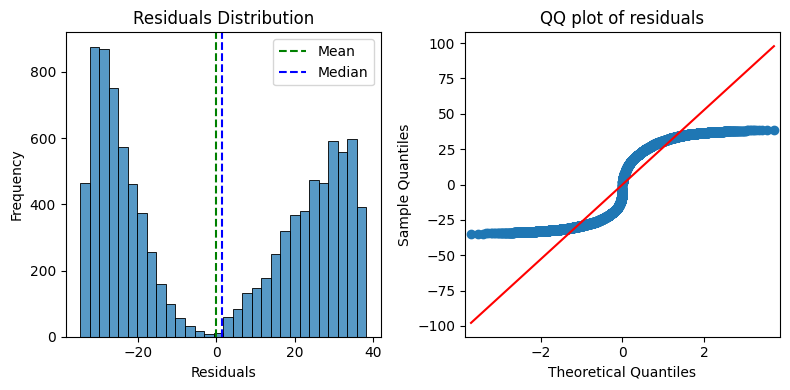

In [69]:
residuals = model_r.resid
# Plot the residuals
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# reesiduals Dist
sns.histplot(residuals, bins=30, ax=axes[0])
axes[0].set_xlabel('Residuals')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Residuals Distribution')

# mean and median lines to the histogram
mean_residuals = residuals.mean()
median_residuals = residuals.median()
axes[0].axvline(x=mean_residuals, color='green', linestyle='--', label='Mean')
axes[0].axvline(x=median_residuals, color='blue', linestyle='--', label='Median')
axes[0].legend()

# QQ plot of residuals
sm.qqplot(residuals, line='s', ax=axes[1])
axes[1].set_xlabel("Theoretical Quantiles")
axes[1].set_ylabel("Sample Quantiles")
axes[1].set_title("QQ plot of residuals")

plt.tight_layout()
plt.show()

- Ideally, one would like to see a normal distribution centered around zero for the residual distribution, but this **histogram** indicates a bimodal distribution that is skewed to the right. The mean is in fact around 0. This plot indicates that the residuals are not normally distributed, violating one of the key assumptions of linear regression.

- The **Q-Q plot** shows that the residuals are not normally distributed, as the points do not fall along the straight line. This plot required research to interpret as I was not familiar with it. From S. Kross as seankross.com: "*The points in Q-Q plot then cross below the blue line indicating that the actual quantiles that are close to zero are farther from zero than they should be theoretically. At the center of the theoretical distribution there are no data in the actual dataset, and therefore there is no point in the Q-Q plot at (0, 0). The upper half of the Q-Q plot is a reflection across X and Y of the bottom half.*" (Kross, 2016) The author also suggest this is the results of a residual distribution that is not normal, lending credibility that this assumptions of linear regression is violated.

#### Reduced model: **Interpretation of the coefficients**: *(Note, this is a very basic interpretation of what this formula tells us, this does not mean what the model is telling us is actually accurate or useful, as it is not statistically siginifigant)*


>   ### **(Initial_days)(ŷ) = 33.6883 + 1.0563(Arthritis) + 0.4551(BackPain)**

- **Constant** (33.6883): Holding all other variables constant, the constant term represents the expected value of the initial days in the hospital when all the independent variables in the model are zero. In other words, if a patient has none of the conditions or characteristics represented by the independent variables (such as arthritis or back pain), their expected initial hospital stay would be approximately 33.6883 days.

- **Arthritis** (1.0563): Holding all other variables constant, having arthritis (Arthritis = 1) is associated with a 1.0563 increase in the initial days in the hospital compared to not having arthritis (arthritis = 0). This indicates that patients with arthritis tend to spend 1.0563 more days in the hospital initially, assuming all other factors remain unchanged.

- **BackPain** (0.4551): Holding all other variables constant, having back pain (BackPain = 1) is associated with a 0.4551 increase in the initial days in the hospital compared to not having back pain (BackPain = 0). This indicates that patients with back pain tend to spend 0.4551 more days in the hospital initially, assuming all other factors remain unchanged.

> ## Limitations, Practical signifigance and Suggestions


Given the summary statistics, residuals, and Q-Q plots that suggest a poor model, I can't recommend using this model for any practical purposes. It's just not reliable enough, statistically or practically speaking. My suggestion would be to collect better data and work with data and medical experts to try and create a better model, or to transform the current data after doing some more research. One idea is to transform the Initial_days variable to make it more normally distributed, like taking the log or splitting the data into two groups based on the bimodal distribution and making separate models for each group (Bradley, 2023). But this would be pretty complex at this point and might not even be necessary if we can create a reduced model that performs better than the initial one. Plus, the dataset just isn't comprehensive enough to really dig into many of the variables further.

The simple OLS model has its own set of limitations that we need to keep in mind. For starters, it assumes a linear relationship between the dependent and independent variables, which might not always be the case in real life. It's also sensitive to outliers, which can skew the estimated coefficients and lead to biased results. The model also assumes that the residuals are normally distributed. Our QQ and residual plots seem to suggest that this is not the case, according to this construction of them. Lastly, the model's performance really depends on the quality and representativeness of the data used. If important variables are missing or poorly representitive, the model might fail to capture the true underlying relationships.

But the biggest limitation, in my opinion is the dataset itself. The analysis is held back by the lack of detailed context in the data we're dealing with. Without knowing the specifics about when variables related to health metrics were measured or what the circumstances were, it's a real challenge to interpret the model's predictors and figure out if it's actually any good at predicting things. To make the dataset more robust and support a modeling process that's more precise and informative, we've got to get our hands on data that's more detailed and context-rich, and that lines up with the specific research questions we're trying to answer. Collaborating with experts in the field and data collection specialists is going to be key.

Finally, this analyst own limited experience and expertiece is an important factor to acknowledge and consider. It is clear in performing this analsys that there is so much to learn and be aware of. In that context, there are many specific point that I would not yet feeel comfortable making reccomendations on with further consult with mentors and field experts. 


### References

- Middleton, K. (2022, November). Getting started with D208 Part I [Webinar]. Western Governors University. Retrieved March 2024, from https://wgu.hosted.panopto.com/Panopto/Pages/Viewer.aspx?id=15e09c73-c5aa-439d-852f-af47001b8970

- Eyre, I. (2024, March). Python Seaborn: A Guide to Using Seaborn for Data Visualization. Real Python. Retrieved March 2024, from https://realpython.com/python-seaborn/


- GeeksforGeeks. (n.d.). Interpreting the results of linear regression using OLS summary. Retrieved March 24, 2024, from https://www.geeksforgeeks.org/interpreting-the-results-of-linear-regression-using-ols-summary/


- Kross, S. (2016, February 29). A Q-Q Plot Dissection Kit. Retrieved March 24, 2024, from https://seankross.com/2016/02/29/A-Q-Q-Plot-Dissection-Kit.html

- Bradley, C. (2023). How do you transform a skewed bimodal data set into a normal distribution? Retrieved March 24, 2024, from https://www.kaggle.com/code/chrisbradley/tab-playground-predicting-bimodal-distribution


- Stack Overflow. (2020, August 10). Residual standard error of a regression in Python. Retrieved March 24, 2024, from https://stackoverflow.com/questions/63333999/residual-standard-error-of-a-regression-in-python

- Western Governors University. (n.d.). R or Python? Retrieved March 24, 2024, from https://www.wgu.edu/online-it-degrees/programming-languages/r-or-python.html

- Sewell, W. (2024). [PowerPoint slides on model tuning]. Western Governors University. Retrieved March 24, 2024, from https://westerngovernorsuniversity-my.sharepoint.com/:p:/g/personal/william_sewell_wgu_edu/ERPQ0YpiQktOl-7YyAVnfLMBR5qeBh2cSv61VaJqe_aHKg?e=FjPhPz

 **Software References**

The following software packages were used in this project:

* **pandas** pandas is a Python library providing data structures and data analysis tools.
* **numpy** NumPy is a Python library for scientific computing.
* **matplotlib** Matplotlib is a Python library for creating static, animated, and interactive visualizations.
* **seaborn** Seaborn is a Python library for statistical data visualization built on top of matplotlib.
* **statsmodels** Statsmodels is a Python library for statistical modeling and econometrics.


- Python Software Foundation. (2023). Python Language Reference, version 3.9.6. Retrieved from https://www.python.org


- Matplotlib:
  Hunter, J. D. (2007). Matplotlib: A 2D graphics environment. *Computing in Science & Engineering, 9*(3), 90-95. Retrieved from https://matplotlib.org

- Statsmodels:
  Seabold, S., & Perktold, J. (2010). Statsmodels: Econometric and statistical modeling with python. In *Proceedings of the 9th Python in Science Conference* (Vol. 57, p. 61). Retrieved from https://www.statsmodels.org

- Pandas:
  McKinney, W. (2010). Data Structures for Statistical Computing in Python. In *Proceedings of the 9th Python in Science Conference* (pp. 51-56). Retrieved from https://pandas.pydata.org

- NumPy:
  Harris, C. R., Millman, K. J., van der Walt, S. J., Gommers, R., Virtanen, P., Cournapeau, D., ... & Oliphant, T. E. (2020). Array programming with NumPy. *Nature, 585*(7825), 357-362. Retrieved from https://numpy.org

- Seaborn:
  Waskom, M. (2021). Seaborn: statistical data visualization. *Journal of Open Source Software, 6*(60), 3021. Retrieved from https://seaborn.pydata.org


In [70]:
# clean cache for improved performance
import gc
x = gc.collect()

x

16883